Koordinat titik X 1 (Datum Clarke 1866) : -2212301.367796142 m
Koordinat titik Y 1 (Datum Clarke 1866) : 5982232.053778601 m
Koordinat titik X 1 (Datum GRS-80 [1979]) : -2212277.295722972 m
Koordinat titik Y 1 (Datum GRS-80 [1979]) : 5982166.96105217 m
Besar pergeseran titik X 1 : 24.072073169983923 m
Besar pergeseran titik Y 1 : -65.09272643085569 m
---
Koordinat titik X 2 (Datum Clarke 1866) : -2219616.7420879467 m
Koordinat titik Y 2 (Datum Clarke 1866) : 5979547.253638623 m
Koordinat titik X 2 (Datum GRS-80 [1979]) : -2219592.590506994 m
Koordinat titik Y 2 (Datum GRS-80 [1979]) : 5979482.190370349 m
Besar pergeseran titik X 2 : 24.151580952573568 m
Besar pergeseran titik Y 2 : -65.06326827406883 m
---
Koordinat titik X 3 (Datum Clarke 1866) : -2219604.101710143 m
Koordinat titik Y 3 (Datum Clarke 1866) : 5979513.201031726 m
Koordinat titik X 3 (Datum GRS-80 [1979]) : -2219579.9491435634 m
Koordinat titik Y 3 (Datum GRS-80 [1979]) : 5979448.135108218 m
Besar pergeseran titik X 3 : 

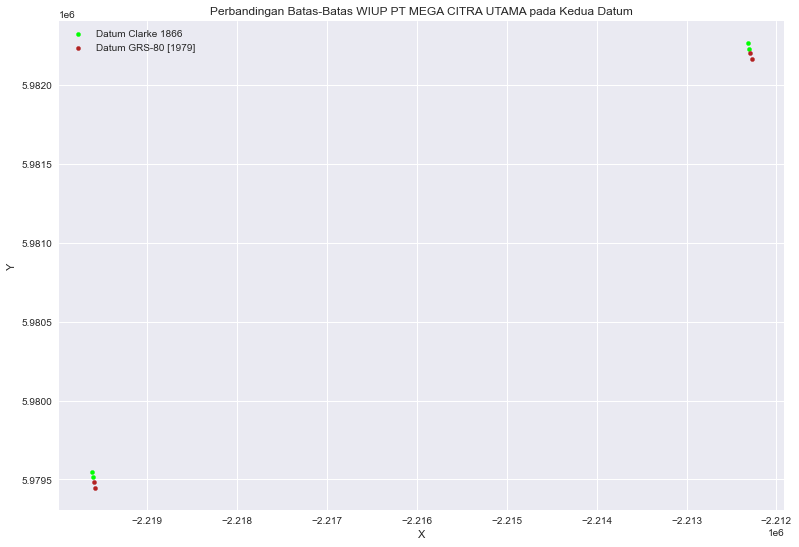

In [1]:
import math
import matplotlib.pyplot as plt

#PT MEGA CITRA UTAMA

#Datum Clarke 1866
a1 = 6_378_206.4
b1 = 6_356_583.8

#Datum GRS-80 (1979)
a2 = 6_378_137
b2 = 6_356_752.3141


B = [110.295, 110.365, 110.365, 110.295]
L = [-0.140, -0.140, -0.256, -0.256]
h = [8, 32, 40, 92]
n = len(B)

a_x1 = []
b_y1 = []
c_x2 = []
d_y2 = []

BG_X = []
BG_Y = []

rms = []

luas1_sementara = []
luas2_sementara = []


for i in range (n):
    #mengkonversikan nilai Bujur dan Lintang kedalam derajat
    konversi1 = math.radians(B[i])
    konversi2 = math.radians(L[i])
    sin_lamda = math.sin(konversi1)
    cos_lamda = math.cos(konversi1)
    sin_phi = math.sin(konversi2)
    cos_phi= math.cos(konversi2)
    
    #mencari nilai koordinat kartesian
    e1 = math.sqrt(1 - (b1**2 / a1**2))
    N1 = (a1 / math.sqrt(1 - (e1**2 * (sin_phi**2))))
    X1 = ((N1 + h[i]) * cos_phi * cos_lamda)
    Y1 = ((N1 + h[i]) * cos_phi * sin_lamda)

    e2 = math.sqrt(1 - (b2**2 / a2**2))
    N2 = (a2 / math.sqrt(1 - (e2**2 * (sin_phi**2))))
    X2 = ((N2 + h[i]) * cos_phi * cos_lamda)
    Y2 = ((N2 + h[i]) * cos_phi * sin_lamda)
    
    a_x1.append(X1)
    b_y1.append(Y1)
    c_x2.append(X2)
    d_y2.append(Y2)
    
    #mencari nilai pergeseran
    Besar_Geser_X = (X2-X1)
    Besar_Geser_Y = (Y2-Y1)
    BG_X.append(Besar_Geser_X)
    BG_Y.append(Besar_Geser_Y)
    
    #mencari nilai RMSE
    x_2 = (X2-X1)**2
    y_2 = (Y2-Y1)**2
    error = (x_2+y_2)
    rms.append(error) 
    
    print('Koordinat titik X',i+1, '(Datum Clarke 1866) :', X1, 'm')
    print('Koordinat titik Y',i+1, '(Datum Clarke 1866) :', Y1, 'm')
    print('Koordinat titik X',i+1, '(Datum GRS-80 [1979]) :', X2, 'm')
    print('Koordinat titik Y',i+1, '(Datum GRS-80 [1979]) :', Y2, 'm')
    print('Besar pergeseran titik X',i+1, ':', Besar_Geser_X, 'm')
    print('Besar pergeseran titik Y',i+1, ':', Besar_Geser_Y, 'm')
    print('---')

#mencari nilai pergeseran (lanjutan)    
Besar_Geser_Rata2_X = sum(BG_X)/len(BG_X)
Besar_Geser_Rata2_Y = sum(BG_Y)/len(BG_Y)
Besar_Geser_Rata2 = (Besar_Geser_Rata2_X + Besar_Geser_Rata2_Y) / 2

#mencari nilai RMSE (lanjutan)
error_total = sum(rms)
RMSE = math.sqrt(error_total / len(rms))

#mencari luas WIUP pada kedua datum
titik_akhir1 = (a_x1[3]*b_y1[0]) - (b_y1[3]*a_x1[0])
titik_akhir2 = (c_x2[3]*d_y2[0]) - (d_y2[3]*c_x2[0])
for j in range (len(a_x1)):
    if j < 3:
        area1 = ((a_x1[j]*b_y1[j+1]) - (b_y1[j]*a_x1[j+1]))
        area2 = ((c_x2[j]*d_y2[j+1]) - (d_y2[j]*c_x2[j+1]))
        luas1_sementara.append(area1)
        luas2_sementara.append(area2)
    
    else:
        print()
        
luas1 = abs((sum(luas1_sementara)+titik_akhir1) / 2)
luas2 = abs((sum(luas2_sementara)+titik_akhir2) / 2)


print('Besar pergeseran rata-rata titik X :', Besar_Geser_Rata2_X, 'm')
print('Besar pergeseran rata-rata titik Y :', Besar_Geser_Rata2_Y, 'm')
print('Besar pergeseran rata-rata total :', Besar_Geser_Rata2, 'm')
print()
print('RMSE :', RMSE)
print()
print('Luas WIUP pada Datum Clarke 1866 :', luas1, 'm2')
print('Luas WIUP pada Datum GRS-80 [1979] :', luas2, 'm2')
print()

#mem-plotkan batas-batas WIUP
plt.style.use('seaborn')
plt.figure(figsize=(13,9))
plt.scatter(a_x1, b_y1, color = 'lime', s = 18, label = 'Datum Clarke 1866')
plt.scatter(c_x2, d_y2, color = 'firebrick', s = 18, label = 'Datum GRS-80 [1979]')
plt.title('Perbandingan Batas-Batas WIUP PT MEGA CITRA UTAMA pada Kedua Datum')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

Koordinat titik X 1 (Datum Clarke 1866) : -2206997.139444585 m
Koordinat titik Y 1 (Datum Clarke 1866) : 5983613.9148125155 m
Koordinat titik X 1 (Datum GRS-80 [1979]) : -2206973.107431179 m
Koordinat titik Y 1 (Datum GRS-80 [1979]) : 5983548.759182159 m
Besar pergeseran titik X 1 : 24.032013406045735 m
Besar pergeseran titik Y 1 : -65.15563035663217 m
---
Koordinat titik X 2 (Datum Clarke 1866) : -2209781.267612718 m
Koordinat titik Y 2 (Datum Clarke 1866) : 5982477.55718974 m
Koordinat titik X 2 (Datum GRS-80 [1979]) : -2209757.2048981143 m
Koordinat titik Y 2 (Datum GRS-80 [1979]) : 5982412.412891436 m
Besar pergeseran titik X 2 : 24.062714603729546 m
Besar pergeseran titik Y 2 : -65.14429830387235 m
---
Koordinat titik X 3 (Datum Clarke 1866) : -2209746.6676298273 m
Koordinat titik Y 3 (Datum Clarke 1866) : 5982383.885646698 m
Koordinat titik X 3 (Datum GRS-80 [1979]) : -2209722.6026166505 m
Koordinat titik Y 3 (Datum GRS-80 [1979]) : 5982318.735125533 m
Besar pergeseran titik X 3 

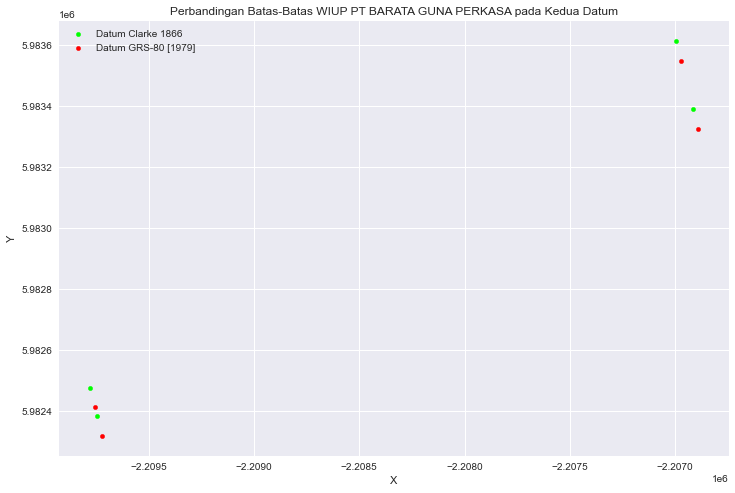

In [2]:
import math
import matplotlib.pyplot as plt
#PT BARATA GUNA PERKASA

#Datum Clarke 1866
a1 = 6_378_206.4
b1 = 6_356_583.8

#Datum GRS-80 (1979)
a2 = 6_378_137
b2 = 6_356_752.3141

B = [110.246, 110.273, 110.273, 110.246]
L = [-0.867, -0.867, -0.927, -0.927]
h = [173, 71, 75, 38]
n = len(B)

a_x1 = []
b_y1 = []
c_x2 = []
d_y2 = []

BG_X = []
BG_Y = []

rms = []

luas1_sementara = []
luas2_sementara = []


for i in range (n):
    #mengkonversikan nilai Bujur dan Lintang kedalam derajat
    konversi1 = math.radians(B[i])
    konversi2 = math.radians(L[i])
    sin_lamda = math.sin(konversi1)
    cos_lamda = math.cos(konversi1)
    sin_phi = math.sin(konversi2)
    cos_phi= math.cos(konversi2)
    
    #mencari nilai koordinat kartesian
    e1 = math.sqrt(1 - (b1**2 / a1**2))
    N1 = (a1 / math.sqrt(1 - (e1**2 * (sin_phi**2))))
    X1 = ((N1 + h[i]) * cos_phi * cos_lamda)
    Y1 = ((N1 + h[i]) * cos_phi * sin_lamda)

    e2 = math.sqrt(1 - (b2**2 / a2**2))
    N2 = (a2 / math.sqrt(1 - (e2**2 * (sin_phi**2))))
    X2 = ((N2 + h[i]) * cos_phi * cos_lamda)
    Y2 = ((N2 + h[i]) * cos_phi * sin_lamda)
    
    a_x1.append(X1)
    b_y1.append(Y1)
    c_x2.append(X2)
    d_y2.append(Y2)
    
    #mencari nilai pergeseran
    Besar_Geser_X = (X2-X1)
    Besar_Geser_Y = (Y2-Y1)
    BG_X.append(Besar_Geser_X)
    BG_Y.append(Besar_Geser_Y)
    
    #mencari nilai RMSE
    x_2 = (X2-X1)**2
    y_2 = (Y2-Y1)**2
    error = (x_2+y_2)
    rms.append(error) 
    
    print('Koordinat titik X',i+1, '(Datum Clarke 1866) :', X1, 'm')
    print('Koordinat titik Y',i+1, '(Datum Clarke 1866) :', Y1, 'm')
    print('Koordinat titik X',i+1, '(Datum GRS-80 [1979]) :', X2, 'm')
    print('Koordinat titik Y',i+1, '(Datum GRS-80 [1979]) :', Y2, 'm')
    print('Besar pergeseran titik X',i+1, ':', Besar_Geser_X, 'm')
    print('Besar pergeseran titik Y',i+1, ':', Besar_Geser_Y, 'm')
    print('---')

#mencari nilai pergeseran (lanjutan)    
Besar_Geser_Rata2_X = sum(BG_X)/len(BG_X)
Besar_Geser_Rata2_Y = sum(BG_Y)/len(BG_Y)
Besar_Geser_Rata2 = (Besar_Geser_Rata2_X + Besar_Geser_Rata2_Y) / 2

#mencari nilai RMSE (lanjutan)
error_total = sum(rms)
RMSE = math.sqrt(error_total / len(rms))

#mencari luas WIUP pada kedua datum
titik_akhir1 = (a_x1[3]*b_y1[0]) - (b_y1[3]*a_x1[0])
titik_akhir2 = (c_x2[3]*d_y2[0]) - (d_y2[3]*c_x2[0])
for j in range (len(a_x1)):
    if j < 3:
        area1 = ((a_x1[j]*b_y1[j+1]) - (b_y1[j]*a_x1[j+1]))
        area2 = ((c_x2[j]*d_y2[j+1]) - (d_y2[j]*c_x2[j+1]))
        luas1_sementara.append(area1)
        luas2_sementara.append(area2)
    
    else:
        print()
        
luas1 = abs((sum(luas1_sementara)+titik_akhir1) / 2)
luas2 = abs((sum(luas2_sementara)+titik_akhir2) / 2)


print('Besar pergeseran rata-rata titik X :', Besar_Geser_Rata2_X, 'm')
print('Besar pergeseran rata-rata titik Y :', Besar_Geser_Rata2_Y, 'm')
print('Besar pergeseran rata-rata total :', Besar_Geser_Rata2, 'm')
print()
print('RMSE :', RMSE)
print()
print('Luas WIUP pada Datum Clarke 1866 :', luas1, 'm2')
print('Luas WIUP pada Datum GRS-80 [1979] :', luas2, 'm2')
print()

#mem-plotkan batas-batas WIUP
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(a_x1, b_y1, color = 'lime', s = 20, label = 'Datum Clarke 1866')
plt.scatter(c_x2, d_y2, color = 'red', s = 20, label = 'Datum GRS-80 [1979]')
plt.title('Perbandingan Batas-Batas WIUP PT BARATA GUNA PERKASA pada Kedua Datum')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

Koordinat titik X 1 (Datum Clarke 1866) : -3345739.489944832 m
Koordinat titik Y 1 (Datum Clarke 1866) : 5421234.18416924 m
Koordinat titik X 1 (Datum GRS-80 [1979]) : -3345702.7576472205 m
Koordinat titik Y 1 (Datum GRS-80 [1979]) : 5421174.66537285 m
Besar pergeseran titik X 1 : 36.73229761142284 m
Besar pergeseran titik Y 1 : -59.5187963899225 m
---
Koordinat titik X 2 (Datum Clarke 1866) : -3349507.132289604 m
Koordinat titik Y 2 (Datum Clarke 1866) : 5418870.762588161 m
Koordinat titik X 2 (Datum GRS-80 [1979]) : -3349470.358448988 m
Koordinat titik Y 2 (Datum GRS-80 [1979]) : 5418811.269450255 m
Besar pergeseran titik X 2 : 36.7738406159915 m
Besar pergeseran titik Y 2 : -59.49313790630549 m
---
Koordinat titik X 3 (Datum Clarke 1866) : -3349286.9038548926 m
Koordinat titik Y 3 (Datum Clarke 1866) : 5418514.4745198535 m
Koordinat titik X 3 (Datum GRS-80 [1979]) : -3349250.120951208 m
Koordinat titik Y 3 (Datum GRS-80 [1979]) : 5418454.96671961 m
Besar pergeseran titik X 3 : 36.78

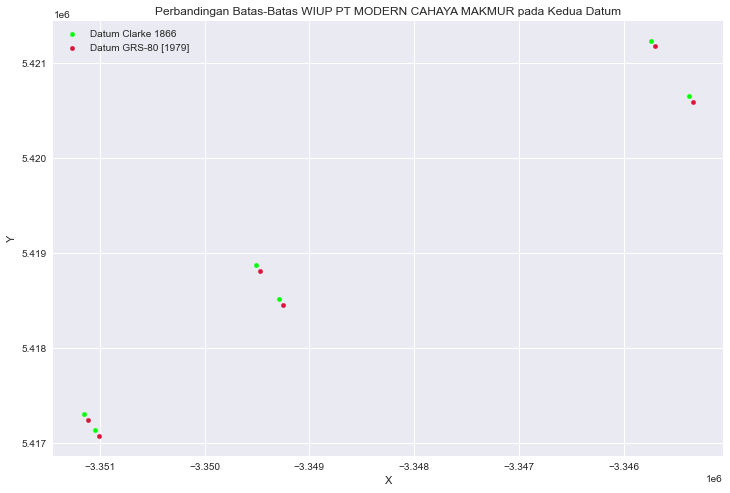

In [3]:
import math
import matplotlib.pyplot as plt
#PT MODERN CAHAYA MAKMUR

#Datum Clarke 1866
a1 = 6_378_206.4
b1 = 6_356_583.8

#Datum GRS-80 (1979)
a2 = 6_378_137
b2 = 6_356_752.3141


B = [121.681, 121.721, 121.721, 121.741, 121.741, 121.681]
L = [-2.966, -2.966, -3.013, -3.013, -3.050, -3.050]
h = [819, 788, 640, 592, 608, 623]
n = len(B)

a_x1 = []
b_y1 = []
c_x2 = []
d_y2 = []

BG_X = []
BG_Y = []

rms = []

luas1_sementara = []
luas2_sementara = []


for i in range (n):
    #mengkonversikan nilai Bujur dan Lintang kedalam derajat
    konversi1 = math.radians(B[i])
    konversi2 = math.radians(L[i])
    sin_lamda = math.sin(konversi1)
    cos_lamda = math.cos(konversi1)
    sin_phi = math.sin(konversi2)
    cos_phi= math.cos(konversi2)
    
    #mencari nilai koordinat kartesian
    e1 = math.sqrt(1 - (b1**2 / a1**2))
    N1 = (a1 / math.sqrt(1 - (e1**2 * (sin_phi**2))))
    X1 = ((N1 + h[i]) * cos_phi * cos_lamda)
    Y1 = ((N1 + h[i]) * cos_phi * sin_lamda)

    e2 = math.sqrt(1 - (b2**2 / a2**2))
    N2 = (a2 / math.sqrt(1 - (e2**2 * (sin_phi**2))))
    X2 = ((N2 + h[i]) * cos_phi * cos_lamda)
    Y2 = ((N2 + h[i]) * cos_phi * sin_lamda)
    
    a_x1.append(X1)
    b_y1.append(Y1)
    c_x2.append(X2)
    d_y2.append(Y2)
    
    #mencari nilai pergeseran
    Besar_Geser_X = (X2-X1)
    Besar_Geser_Y = (Y2-Y1)
    BG_X.append(Besar_Geser_X)
    BG_Y.append(Besar_Geser_Y)
    
    #mencari nilai RMSE
    x_2 = (X2-X1)**2
    y_2 = (Y2-Y1)**2
    error = (x_2+y_2)
    rms.append(error) 
    
    print('Koordinat titik X',i+1, '(Datum Clarke 1866) :', X1, 'm')
    print('Koordinat titik Y',i+1, '(Datum Clarke 1866) :', Y1, 'm')
    print('Koordinat titik X',i+1, '(Datum GRS-80 [1979]) :', X2, 'm')
    print('Koordinat titik Y',i+1, '(Datum GRS-80 [1979]) :', Y2, 'm')
    print('Besar pergeseran titik X',i+1, ':', Besar_Geser_X, 'm')
    print('Besar pergeseran titik Y',i+1, ':', Besar_Geser_Y, 'm')
    print('---')

#mencari nilai pergeseran (lanjutan)    
Besar_Geser_Rata2_X = sum(BG_X)/len(BG_X)
Besar_Geser_Rata2_Y = sum(BG_Y)/len(BG_Y)
Besar_Geser_Rata2 = (Besar_Geser_Rata2_X + Besar_Geser_Rata2_Y) / 2

#mencari nilai RMSE (lanjutan)
error_total = sum(rms)
RMSE = math.sqrt(error_total / len(rms))

#mencari luas WIUP pada kedua datum
titik_akhir1 = (a_x1[5]*b_y1[0]) - (b_y1[5]*a_x1[0])
titik_akhir2 = (c_x2[5]*d_y2[0]) - (d_y2[5]*c_x2[0])
for j in range (len(a_x1)):
    if j < 5:
        area1 = ((a_x1[j]*b_y1[j+1]) - (b_y1[j]*a_x1[j+1]))
        area2 = ((c_x2[j]*d_y2[j+1]) - (d_y2[j]*c_x2[j+1]))
        luas1_sementara.append(area1)
        luas2_sementara.append(area2)
    
    else:
        print()
        
luas1 = abs((sum(luas1_sementara)+titik_akhir1) / 2)
luas2 = abs((sum(luas2_sementara)+titik_akhir2) / 2)


print('Besar pergeseran rata-rata titik X :', Besar_Geser_Rata2_X, 'm')
print('Besar pergeseran rata-rata titik Y :', Besar_Geser_Rata2_Y, 'm')
print('Besar pergeseran rata-rata total :', Besar_Geser_Rata2, 'm')
print()
print('RMSE :', RMSE)
print()
print('Luas WIUP pada Datum Clarke 1866 :', luas1, 'm2')
print('Luas WIUP pada Datum GRS-80 [1979] :', luas2, 'm2')
print()

#mem-plotkan batas-batas WIUP
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(a_x1, b_y1, color = 'lime', s = 20, label = 'Datum Clarke 1866')
plt.scatter(c_x2, d_y2, color = 'crimson', s = 20, label = 'Datum GRS-80 [1979]')
plt.title('Perbandingan Batas-Batas WIUP PT MODERN CAHAYA MAKMUR pada Kedua Datum')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

Koordinat titik X 1 (Datum Clarke 1866) : -2901244.9198633498 m
Koordinat titik Y 1 (Datum Clarke 1866) : 5595156.602618383 m
Koordinat titik X 1 (Datum GRS-80 [1979]) : -2901210.7802219437 m
Koordinat titik Y 1 (Datum GRS-80 [1979]) : 5595090.763075255 m
Besar pergeseran titik X 1 : 34.13964140601456 m
Besar pergeseran titik Y 1 : -65.83954312838614 m
---
Koordinat titik X 2 (Datum Clarke 1866) : -2907865.0584744145 m
Koordinat titik Y 2 (Datum Clarke 1866) : 5591912.666962427 m
Koordinat titik X 2 (Datum GRS-80 [1979]) : -2907830.8418655414 m
Koordinat titik Y 2 (Datum GRS-80 [1979]) : 5591846.867386199 m
Besar pergeseran titik X 2 : 34.216608873102814 m
Besar pergeseran titik Y 2 : -65.79957622848451 m
---
Koordinat titik X 3 (Datum Clarke 1866) : -2906598.8104438204 m
Koordinat titik Y 3 (Datum Clarke 1866) : 5589477.633609981 m
Koordinat titik X 3 (Datum GRS-80 [1979]) : -2906564.5330770104 m
Koordinat titik Y 3 (Datum GRS-80 [1979]) : 5589411.717194398 m
Besar pergeseran titik X 

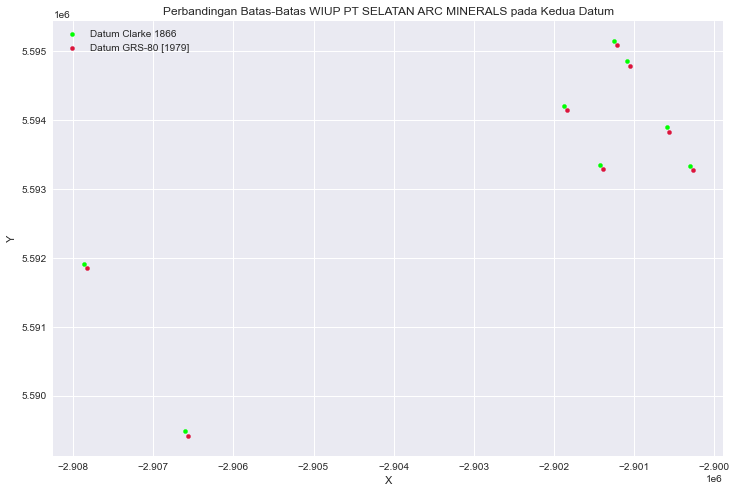

In [4]:
import math
import matplotlib.pyplot as plt
#PT SELATAN ARC MINERALS

#Datum Clarke 1866
a1 = 6_378_206.4
b1 = 6_356_583.8

#Datum GRS-80 (1979)
a2 = 6_378_137
b2 = 6_356_752.3141


B = [117.408, 117.475, 117.475, 117.408, 117.408, 117.417, 117.417, 117.408]
L = [-8.892, -8.892, -9.017, -9.017, -8.975, -8.975, -8.925, -8.925]
h = [566, 740, 140, 675, 575, 475, 579, 797]
n = len(B)

a_x1 = []
b_y1 = []
c_x2 = []
d_y2 = []

BG_X = []
BG_Y = []

rms = []

luas1_sementara = []
luas2_sementara = []


for i in range (n):
    #mengkonversikan nilai Bujur dan Lintang kedalam derajat
    konversi1 = math.radians(B[i])
    konversi2 = math.radians(L[i])
    sin_lamda = math.sin(konversi1)
    cos_lamda = math.cos(konversi1)
    sin_phi = math.sin(konversi2)
    cos_phi= math.cos(konversi2)
    
    #mencari nilai koordinat kartesian
    e1 = math.sqrt(1 - (b1**2 / a1**2))
    N1 = (a1 / math.sqrt(1 - (e1**2 * (sin_phi**2))))
    X1 = ((N1 + h[i]) * cos_phi * cos_lamda)
    Y1 = ((N1 + h[i]) * cos_phi * sin_lamda)

    e2 = math.sqrt(1 - (b2**2 / a2**2))
    N2 = (a2 / math.sqrt(1 - (e2**2 * (sin_phi**2))))
    X2 = ((N2 + h[i]) * cos_phi * cos_lamda)
    Y2 = ((N2 + h[i]) * cos_phi * sin_lamda)
    
    a_x1.append(X1)
    b_y1.append(Y1)
    c_x2.append(X2)
    d_y2.append(Y2)
    
    #mencari nilai pergeseran
    Besar_Geser_X = (X2-X1)
    Besar_Geser_Y = (Y2-Y1)
    BG_X.append(Besar_Geser_X)
    BG_Y.append(Besar_Geser_Y)
    
    #mencari nilai RMSE
    x_2 = (X2-X1)**2
    y_2 = (Y2-Y1)**2
    error = (x_2+y_2)
    rms.append(error) 
    
    print('Koordinat titik X',i+1, '(Datum Clarke 1866) :', X1, 'm')
    print('Koordinat titik Y',i+1, '(Datum Clarke 1866) :', Y1, 'm')
    print('Koordinat titik X',i+1, '(Datum GRS-80 [1979]) :', X2, 'm')
    print('Koordinat titik Y',i+1, '(Datum GRS-80 [1979]) :', Y2, 'm')
    print('Besar pergeseran titik X',i+1, ':', Besar_Geser_X, 'm')
    print('Besar pergeseran titik Y',i+1, ':', Besar_Geser_Y, 'm')
    print('---')

#mencari nilai pergeseran (lanjutan)    
Besar_Geser_Rata2_X = sum(BG_X)/len(BG_X)
Besar_Geser_Rata2_Y = sum(BG_Y)/len(BG_Y)
Besar_Geser_Rata2 = (Besar_Geser_Rata2_X + Besar_Geser_Rata2_Y) / 2

#mencari nilai RMSE (lanjutan)
error_total = sum(rms)
RMSE = math.sqrt(error_total / len(rms))

#mencari luas WIUP pada kedua datum
titik_akhir1 = (a_x1[7]*b_y1[0]) - (b_y1[7]*a_x1[0])
titik_akhir2 = (c_x2[7]*d_y2[0]) - (d_y2[7]*c_x2[0])
for j in range (len(a_x1)):
    if j < 7:
        area1 = ((a_x1[j]*b_y1[j+1]) - (b_y1[j]*a_x1[j+1]))
        area2 = ((c_x2[j]*d_y2[j+1]) - (d_y2[j]*c_x2[j+1]))
        luas1_sementara.append(area1)
        luas2_sementara.append(area2)
        
    else:
        print()
        
luas1 = abs((sum(luas1_sementara)+titik_akhir1) / 2)
luas2 = abs((sum(luas2_sementara)+titik_akhir2) / 2)


print('Besar pergeseran rata-rata titik X :', Besar_Geser_Rata2_X, 'm')
print('Besar pergeseran rata-rata titik Y :', Besar_Geser_Rata2_Y, 'm')
print('Besar pergeseran rata-rata total :', Besar_Geser_Rata2, 'm')
print()
print('RMSE :', RMSE)
print()
print('Luas WIUP pada Datum Clarke 1866 :', luas1, 'm2')
print('Luas WIUP pada Datum GRS-80 [1979] :', luas2, 'm2')
print()

#mem-plotkan batas-batas WIUP
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(a_x1, b_y1, color = 'lime', s = 18, label = 'Datum Clarke 1866')
plt.scatter(c_x2, d_y2, color = 'crimson', s = 18, label = 'Datum GRS-80 [1979]')
plt.title('Perbandingan Batas-Batas WIUP PT SELATAN ARC MINERALS pada Kedua Datum')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()